In [2]:
# imports
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

# load dataframe
dfTest = pd.read_csv("..\\Datasets\\train.csv")


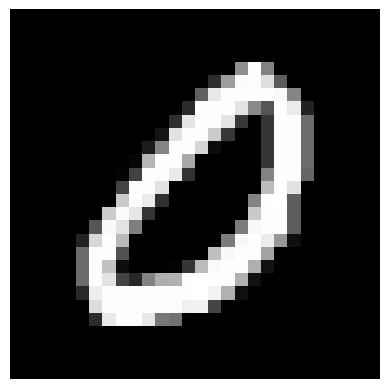

In [3]:
# renderization of a random image 

pixel_data = dfTest.iloc[17,1:].values
image_array = pixel_data.reshape((28,28))

plt.imshow(image_array,cmap = 'gray',vmin = 0,vmax = 255)
plt.axis('off')
plt.show()



In [4]:
# Neural net
import torch
import torch.nn as nn # neural network

Criterion for clasification of images to digits between 0 and 9 -> Cross entropy loss 

-> Probability distribution (values between 0 and 1) between the N different classes/possible outputs
    -> In this case N = 10

Formula:
Loss= -sum[i...N] (yi·log(pi)) 
yi = binary indicator (0 or 1) if label i (0...9) is the correct clasification
pi = predicted possibility for class i



In [5]:
criterion = nn.CrossEntropyLoss()

# manual def

#def criterion(yhat, y):
#    return -torch.mean(torch.sum(y * torch.log(yhat), dim = 1))

In [6]:
# Simple Neural Network:

class digit_rec_NN(nn.Module):
    def __init__(self):
        super(digit_rec_NN, self).__init__()
        self.fc1 = nn.Linear(28*28, 256)  # 28 * 28 is the dimension of the image and 256 is the number of starting neurons -> This layer only flattens the image into 256 values so it can be used by the next layer
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)  # Output layer for 10 classes ( 0 - 9 )
        self.soft = nn.Softmax(dim = 1) # softmax transforms into values between 0 and 1 (Linear could have negative values)
    
    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the image
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.soft(self.fc4(x)) 
        return x

In [7]:
# Prepare Data for training

from torch.utils.data import Dataset, DataLoader
class Data(Dataset):
     # constructor
     def __init__(self, df):
          self.y = torch.tensor(df["label"].values, dtype=torch.long) # y = result (0 - 9 )
          self.x = torch.tensor(df.iloc[:,1:].values,dtype=torch.float32) # x is every pixel column 
          self.len = self.x.shape[0] # saves in len attribute the num of rows on the dataset
          

     def __len__(self):
          return self.len
     
     def __getitem__(self, index):
           return (self.x[index]), (self.y[index]) # returns image array and digit


In [8]:
# Create NN Model

model = digit_rec_NN()

# Prepara Dataset

Dataset = Data(dfTest)

device : str = 'cuda' if  torch.cuda.is_available() else 'cpu'
model.to(device)
print(device)

trainloader = DataLoader(Dataset, batch_size=64, shuffle=True)



cuda


In [9]:
# Define optimizer 

# Optimizer is what updates the weights and biases of the NN trough gradient descent (SGD)

optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)
#, momentum = 0.0, weight_decay=0.0001, dampening=0, nesterov = True)

# lr = learning rate. Values between 0 and 1. Controls the size of the step that the optimizer takes in the direction of minimizing loss function. Higer value -> faster learning but can cause instability. Lower value -> slower but more stable
# momentum = adds a fraction of the previous update to the current update. Smooths optimization progress. 
# weight decay -> Ads a penalty to the loss function to discourage large weights and prevent overfitting
# dampening -> dampens momentum to make updates more stable
# nesterov (T or F) -> enables Nesterov momentum, which changes how momentum is applied

In [10]:
# training

cycles : int = 100
running_loss_arr = []
images : torch.tensor
labels : torch.tensor
outputs : torch.tensor
loss : torch.tensor
running_loss : float
avg_loss : float

for epoch in range(cycles):
    running_loss = 0.0 # reset running loss

    for  i,data in enumerate(trainloader,0):
        images,labels = data
        images,labels = images.to(device),labels.to(device)
        


        # We set the gradient to Zero
        optimizer.zero_grad()


        #We get production for input x
        outputs = model(images)


        # We calculate the loss for that given input
        loss = criterion(outputs, labels)


        # We do the Stochastic Gradient Descent
        loss.backward() # We calculate the derivative
        optimizer.step() # and advance a step in the gradient with the calculated
        
        #Add running loss
        running_loss += loss.item()
    # check for running_loss each epoch
    avg_loss = running_loss / i
    #print(f"[Epoch {epoch + 1}, Batch {i + 1}] Loss: {avg_loss:.16f}")
    running_loss_arr.append(avg_loss)



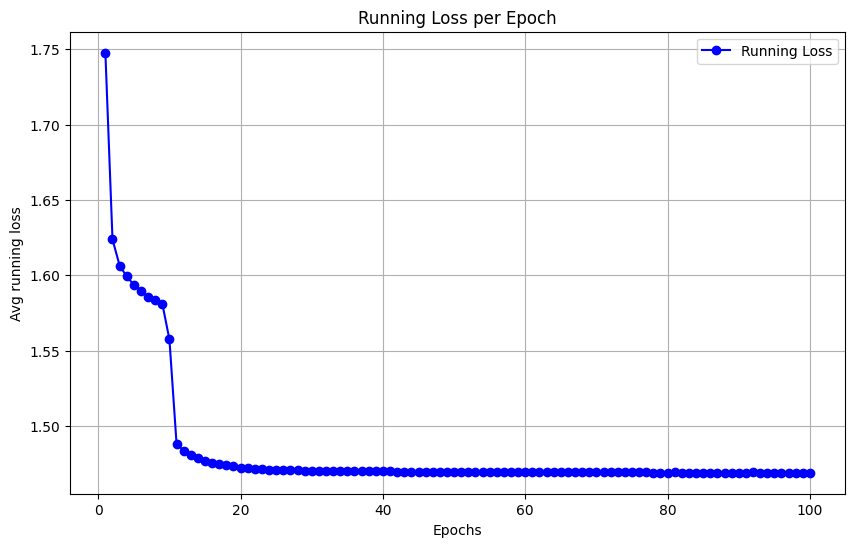

In [11]:
# Check running_loss_arr
# for this we have matplotlib plt

epochs : int = range(1, len(running_loss_arr) + 1)

# Plot the running loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, running_loss_arr, marker='o', linestyle='-', color='b', label='Running Loss')
plt.xlabel('Epochs')
plt.ylabel('Avg running loss')
plt.title('Running Loss per Epoch')
plt.legend()
plt.grid(True)
plt.show()



In [13]:
# test acuaracy

df2 = pd.read_csv("..\\Datasets\\test.csv")

# convert dataset into NumPy (excluding first row (labels))

test_data = df2.values[1:]

for image_array in test_data:
    input_tensor = torch.tensor(image_array, dtype=torch.float32)

    predicted_result = model(input_tensor.to(device))

    print(torch.argmax(predicted_result, dim = 1).item())
    #print(predicted_result)

    '''image = image_array.reshape((28,28))
    plt.imshow(image,cmap = 'gray',vmin = 0,vmax = 255)
    plt.axis('off')
    plt.show()'''






0
9
9
3
7
0
3
0
3
5
7
4
0
4
3
3
1
9
0
9
1
1
5
7
4
2
7
4
7
7
5
4
2
6
2
5
5
1
6
7
7
4
9
8
7
8
2
6
7
6
8
8
3
8
2
1
2
2
0
4
1
7
0
0
0
1
9
0
1
6
5
8
8
2
8
8
9
2
3
5
4
1
0
9
2
4
3
6
7
2
0
6
6
1
4
3
9
7
4
0
9
2
0
7
3
0
5
0
8
0
0
4
7
1
7
1
1
3
3
3
7
2
8
6
3
8
7
8
4
3
5
6
0
0
0
3
1
3
0
4
3
4
5
5
8
7
7
2
8
4
3
5
6
5
3
7
5
7
8
3
0
4
5
1
2
7
6
3
0
2
7
8
6
1
3
7
4
1
2
4
8
5
2
4
9
2
1
6
0
6
1
4
9
6
0
9
7
6
9
1
9
0
9
9
0
8
4
6
2
0
9
3
6
3
2
1
6
3
4
2
3
1
2
2
0
4
6
1
0
0
4
9
1
7
3
2
3
8
6
8
6
2
8
5
5
4
8
3
5
9
7
1
3
8
4
5
1
4
5
6
3
3
5
7
0
6
8
3
1
6
0
6
3
9
9
1
5
8
4
0
9
2
0
5
3
7
1
9
9
5
7
7
9
9
6
3
0
3
3
6
9
8
2
6
3
7
1
4
5
8
5
9
0
0
3
3
4
1
8
4
1
1
9
8
4
5
1
5
3
6
3
1
3
0
9
0
0
6
0
6
3
1
8
6
0
6
5
2
2
6
7
7
2
5
8
3
9
2
7
8
6
3
8
4
2
3
8
1
6
4
8
7
9
7
6
9
5
3
7
6
5
5
9
2
6
2
1
3
7
1
7
9
9
6
1
1
1
7
3
9
7
6
1
1
1
9
3
5
5
5
0
4
1
2
3
1
1
3
5
9
6
6
5
3
1
4
7
4
7
4
8
5
2
6
1
3
9
5
0
8
4
7
4
4
4
1
5
3
9
5
7
6
9
5
9
2
3
5
6
6
7
5
0
5
1
7
4
4
1
1
4
9
5
6
0
1
3
1
0
4
8
1
2
7
9
4
8
3
7
7
4
2
4
2
7
6
3
2
0
6


In [ ]:
# accuaracy 
model.eval()
total : int = 0
right : int = 0
image : torch.tensor 
label : torch.tensor
image_array : torch.tensor
for image_array, label in Dataset:
    total += 1
    predicted_result = torch.argmax(model(image_array.to(device)), dim=1).item()
    right += label.item()==predicted_result

print(f'Accuaracy: {right/total}')





Accuaracy: 0.9952142857142857


In [ ]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(0))

True
1
NVIDIA GeForce RTX 3060 Ti
